# Bank Churn Prediction Using Machine Learning 

## Objective:
##### Our objective is to build a machine learning model to predict whether the customer will churn or not in the next six months.

#### Data Source: Kaggle dataset

In [1]:
!pip install xgboost

# Import Library

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

from scipy import stats

from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

import re
from sklearn.metrics import roc_auc_score, roc_curve,accuracy_score, precision_score, recall_score, make_scorer
from sklearn.metrics import classification_report,confusion_matrix


# Import Data

In [3]:
data = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv')
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.tail()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [6]:
data.duplicated().sum()

0

In [7]:
## Cheaking wheather any duplicate record present or not
data['CustomerId'].duplicated().sum()

0

In [8]:
data = data.drop(["CustomerId", "Surname"], axis = 1)

In [9]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
data['Churn'].value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [11]:
data.describe()

,CreditScore,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [12]:
data['Churn'].value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [13]:
data['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [14]:
data['Has Credit Card'].value_counts()

1    7055
0    2945
Name: Has Credit Card, dtype: int64

In [15]:
data['Is Active Member'].value_counts()

1    5151
0    4849
Name: Is Active Member, dtype: int64

In [16]:
data['Num Of Products'].value_counts()

1    5084
2    4590
3     266
4      60
Name: Num Of Products, dtype: int64

In [17]:
data['Tenure'].value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

In [18]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [19]:
data['Age'].value_counts()

37    478
38    477
35    474
36    456
34    447
33    442
40    432
39    423
32    418
31    404
41    366
29    348
30    327
42    321
43    297
28    273
44    257
45    229
46    226
27    209
26    200
47    175
48    168
25    154
49    147
50    134
24    132
51    119
52    102
23     99
22     84
54     84
55     82
57     75
53     74
56     70
58     67
60     62
59     62
61     53
21     53
62     52
63     40
20     40
64     37
67     37
66     35
71     27
19     27
18     22
69     22
72     21
68     19
74     18
65     18
70     18
73     13
76     11
77     10
75      9
78      5
79      4
81      4
80      3
84      2
92      2
82      1
88      1
85      1
83      1
Name: Age, dtype: int64

In [20]:
def print_unique_column(data):
    for column in data:
        #if data[column].dtypes=='object':
            print(f'{column} : {data[column].unique()}')

In [21]:
print_unique_column(data)

CreditScore : [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 

In [22]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Data Visualization

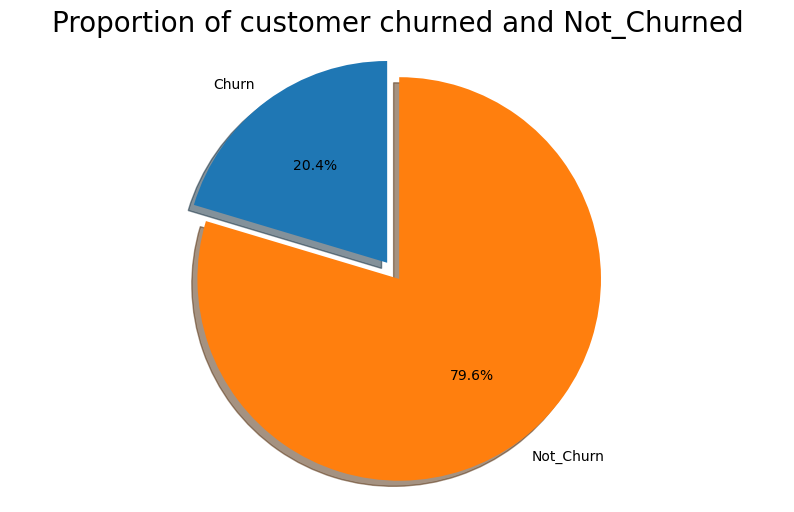

In [23]:
labels = 'Churn', 'Not_Churn'
sizes = [data.Churn[data['Churn']==1].count(), data.Churn[data['Churn']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and Not_Churned", size = 20)
plt.show()

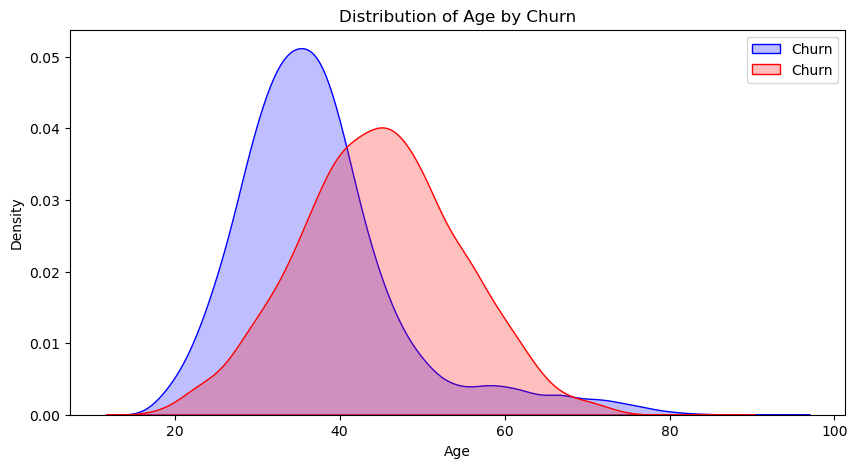

In [24]:
# Variation of churn rate with age of customers

plt.figure(figsize=(10,5))
ax = sns.kdeplot(data['Age'][(data['Churn'] == 0)], color = 'Blue', fill=True)
ax = sns.kdeplot(data['Age'][(data['Churn'] == 1)], color = 'Red', fill=True)

ax.legend(['Churn', 'Churn'], loc = 'upper right')
ax.set_ylabel("Density")
ax.set_xlabel('Age')
ax.set_title('Distribution of Age by Churn')
plt.show()

<AxesSubplot:xlabel='Is Active Member', ylabel='count'>

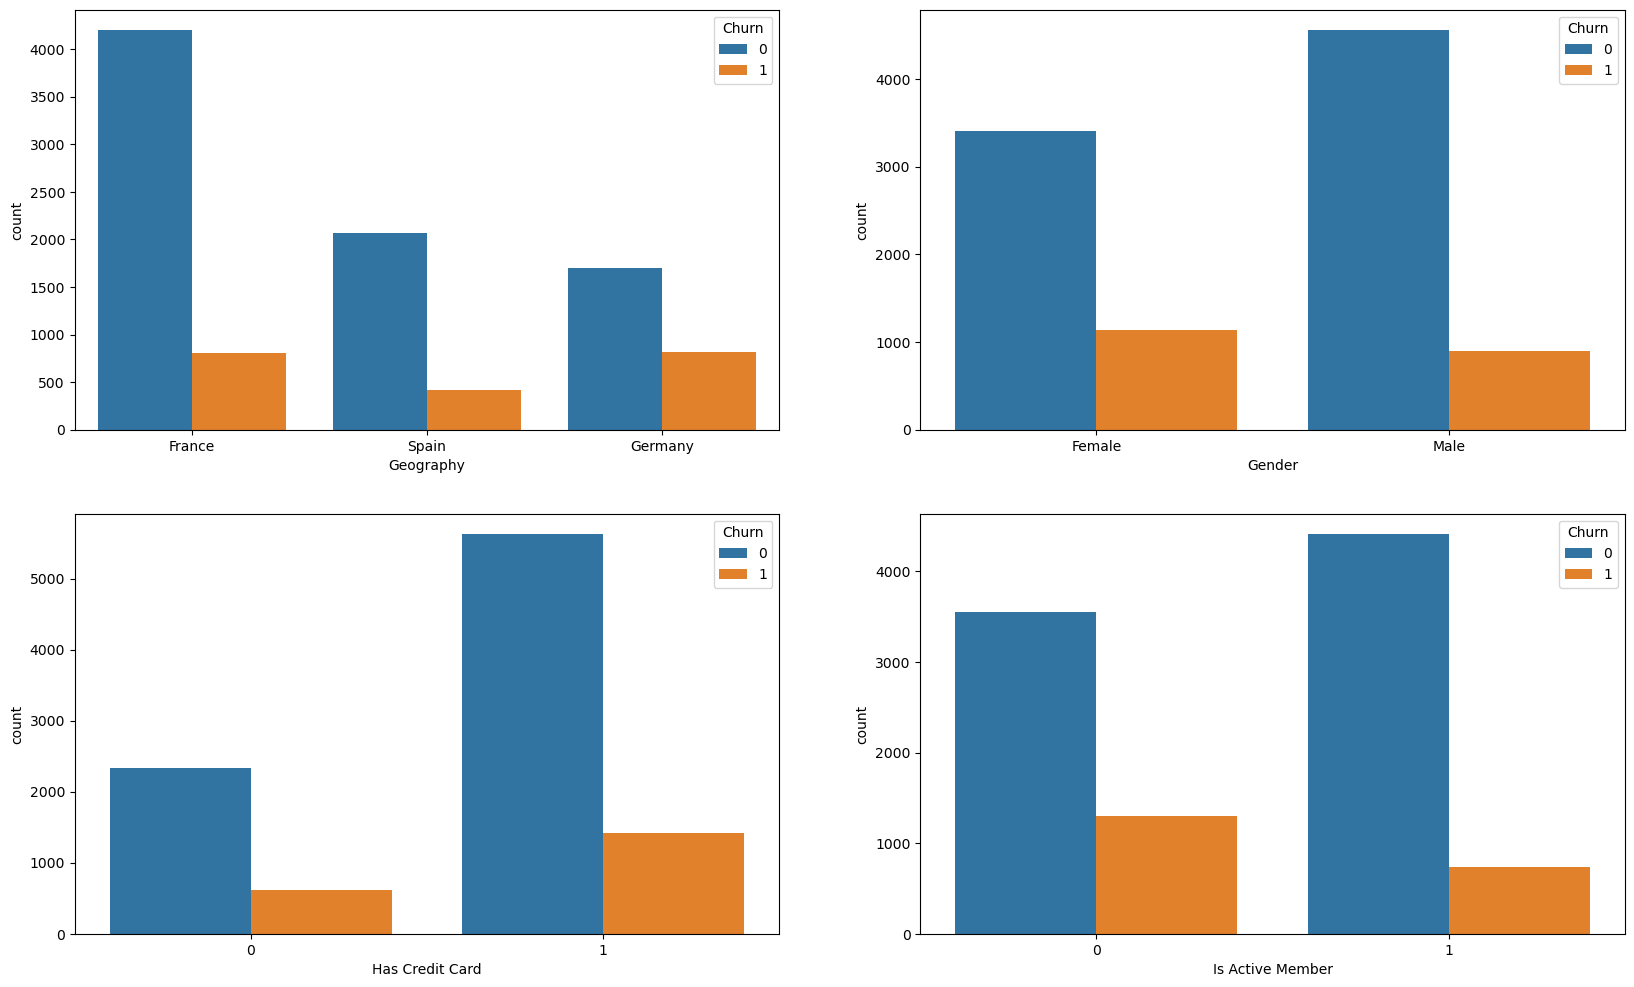

In [25]:
# We first review the 'Status' relation with categorical variables
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Churn',data = data, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Churn',data = data, ax=axarr[0][1])
sns.countplot(x='Has Credit Card', hue = 'Churn',data = data, ax=axarr[1][0])
sns.countplot(x='Is Active Member', hue = 'Churn',data = data, ax=axarr[1][1])

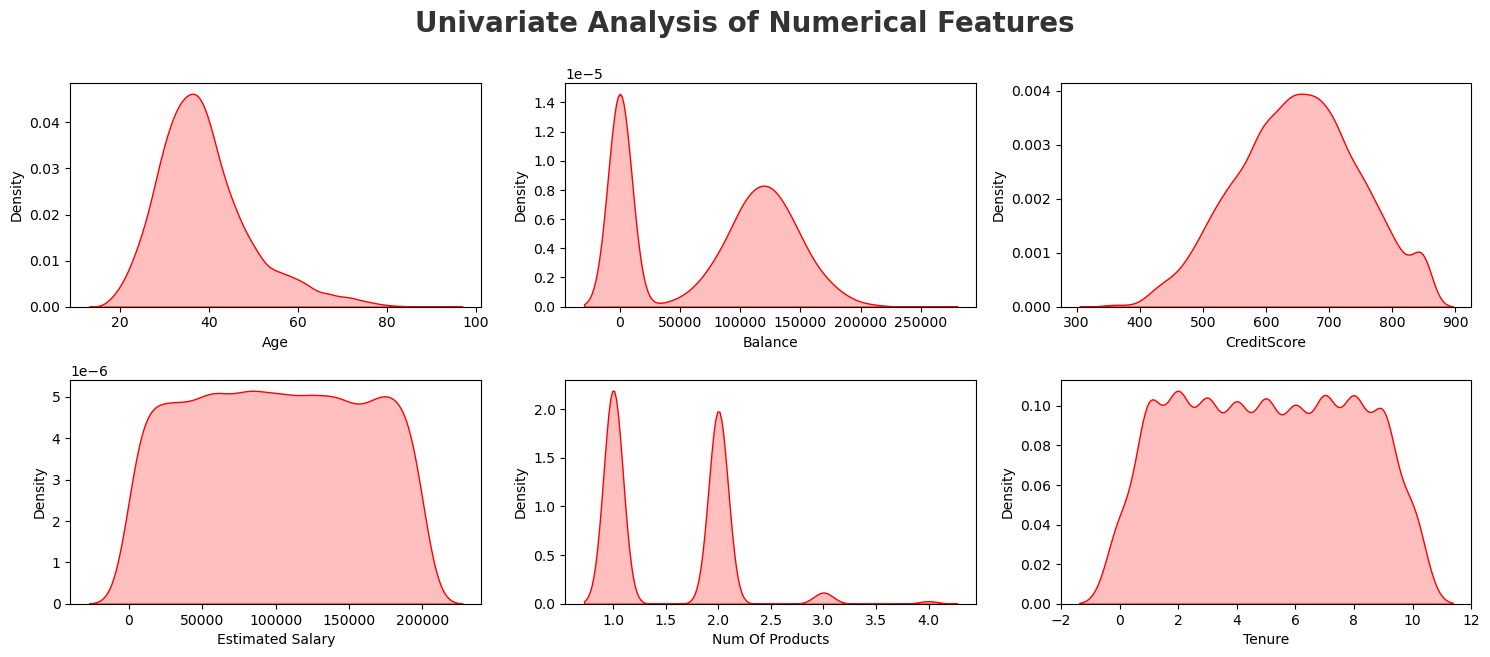

In [26]:
numeric_features = ['Age', 'Balance', 'CreditScore','Estimated Salary','Num Of Products', 'Tenure']
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=data[numeric_features[i]],shade=True, color='r')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

We note the following:

1. Majority of the data is from persons from France. However, the proportion of churned customers is with inversely related to the population of customers alluding to the bank possibly having a problem (maybe not enough customer service resources allocated) in the areas where it has fewer clients.
2. The proportion of female customers churning is also greater than that of male customers
3. Interestingly, majority of the customers that churned are those with credit cards. Given that majority of the customers have credit cards could prove this to be just a coincidence.
4. Unsurprisingly the inactive members have a greater churn. Worryingly is that the overall proportion of inactive mebers is quite high suggesting that the bank may need a program implemented to turn this group to active customers as this will definately have a positive impact on the customer churn.

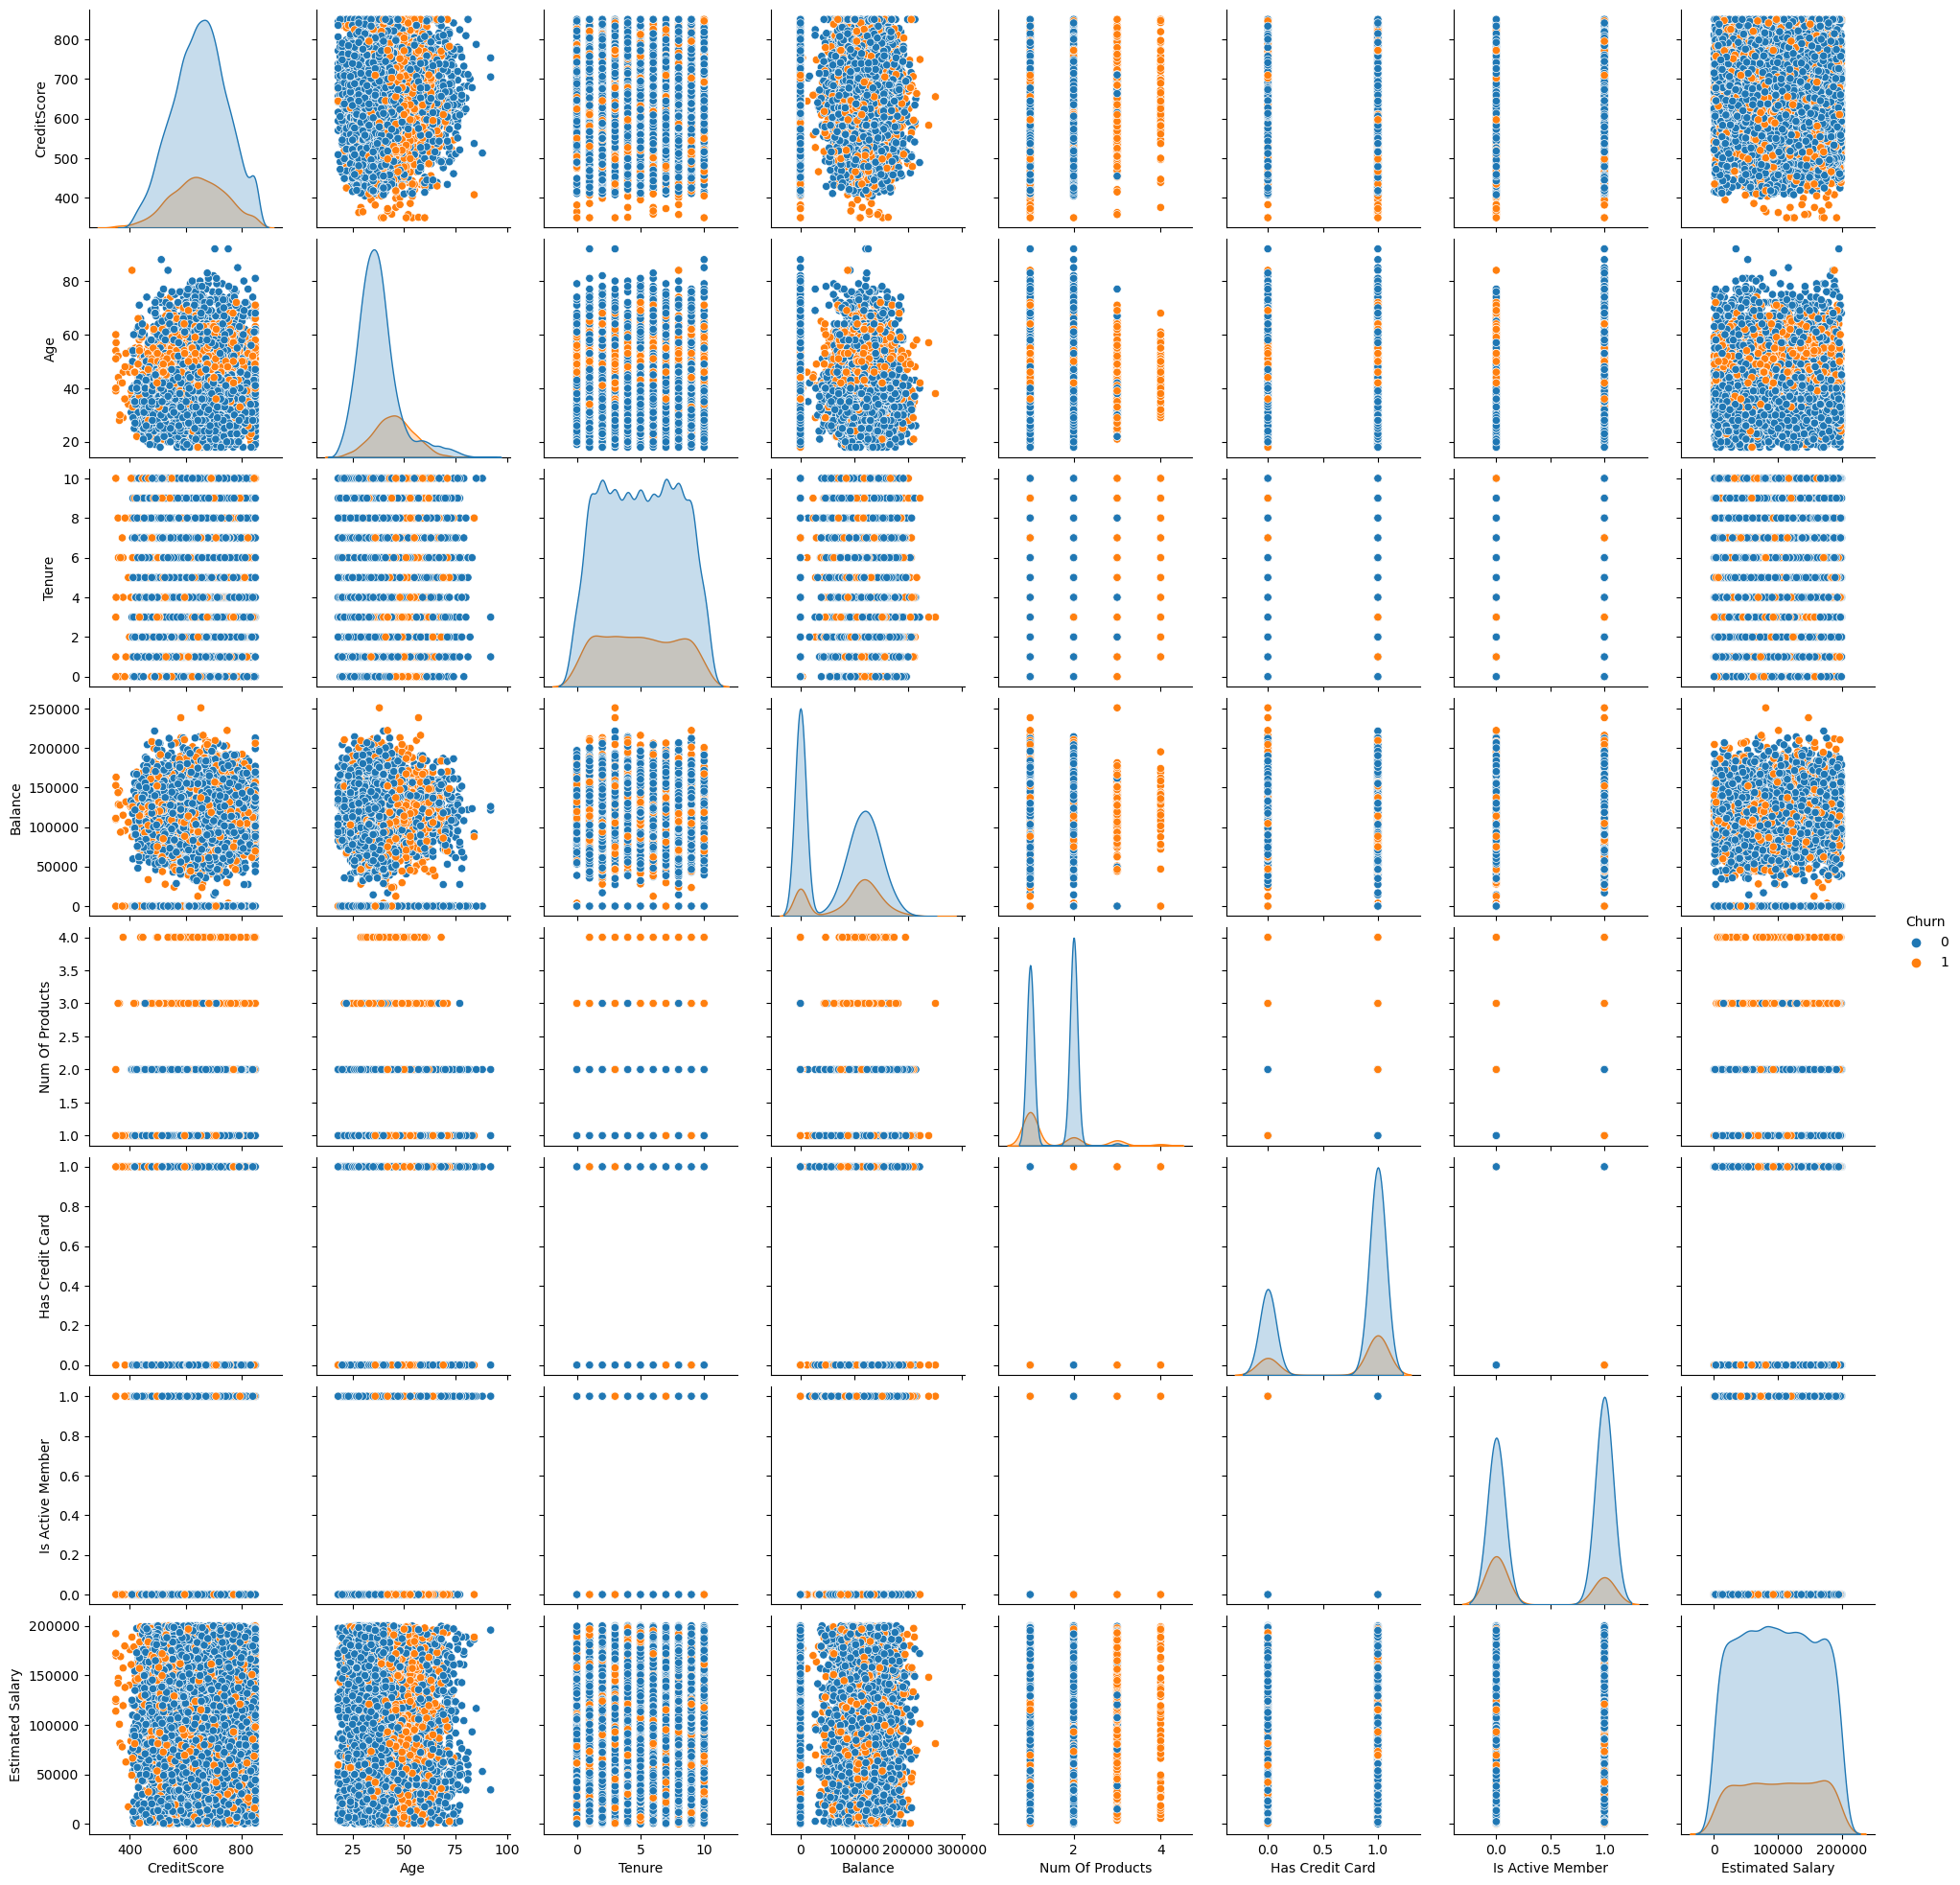

In [27]:
#Variation of each feature with respect to other features
sns.pairplot(data, hue='Churn')
plt.show()

# Data Preprocessing

Handling Outliers

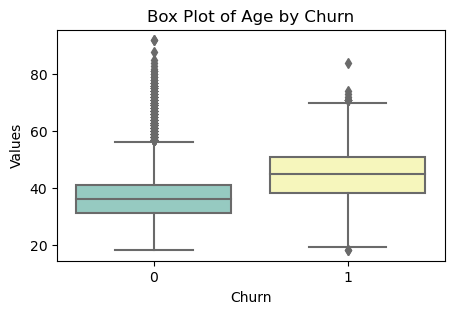

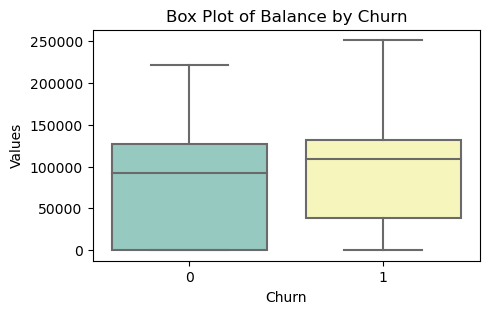

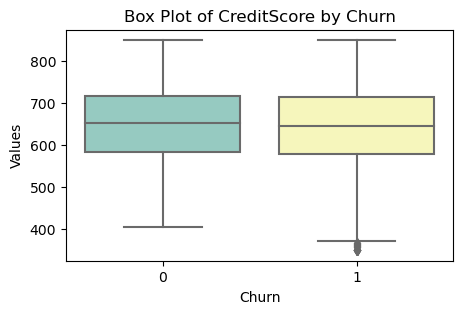

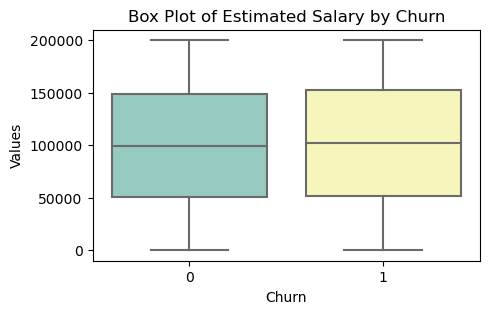

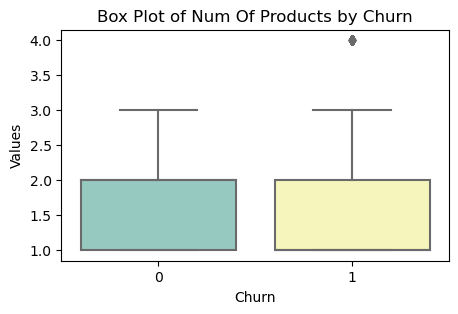

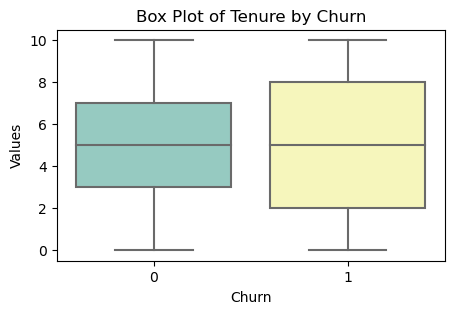

In [28]:
# Select numeric columns for box plot visualization
numeric_columns = ['Age', 'Balance', 'CreditScore','Estimated Salary','Num Of Products', 'Tenure']

# Loop through numeric columns and create box plots for churn categories
for column in numeric_columns:
    plt.figure(figsize=(5, 3))
    sns.boxplot(data=data, x='Churn', y=column, palette='Set3', showfliers=True)
    plt.title(f'Box Plot of {column} by Churn')
    plt.xlabel('Churn')
    plt.ylabel('Values')
    plt.show()

In [29]:
numeric_columns = ['Age', 'Estimated Salary','CreditScore' ,'Balance', 'Num Of Products', 'Tenure' ]

# Function to count outliers using IQR method
def count_outliers(column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    outliers_count = len(data[(data[column] < lower_bound) | (data[column] > upper_bound)])
    return outliers_count

# Count outliers for each numeric column
for column in numeric_columns:
    outliers_count = count_outliers(column)
    print(f"Number of outliers in {column}: {outliers_count}")

Number of outliers in Age: 359
Number of outliers in Estimated Salary: 0
Number of outliers in CreditScore: 15
Number of outliers in Balance: 0
Number of outliers in Num Of Products: 60
Number of outliers in Tenure: 0


In [30]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [31]:

# Function to remove outliers using IQR method
def remove_outliers(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

# Columns with outliers
numeric_columns_with_outliers = ['Age', 'Estimated Salary', 'CreditScore', 'Balance', 'Num Of Products', 'Tenure']

# Remove outliers for each numeric column with outliers
for column in numeric_columns_with_outliers:
    data = remove_outliers(data, column)

# Save the cleaned dataframe to a new CSV file if needed
data.to_csv('cleaned_dataframe.csv', index=False)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9569 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CreditScore       9569 non-null   int64  
 1   Geography         9569 non-null   object 
 2   Gender            9569 non-null   object 
 3   Age               9569 non-null   int64  
 4   Tenure            9569 non-null   int64  
 5   Balance           9569 non-null   float64
 6   Num Of Products   9569 non-null   int64  
 7   Has Credit Card   9569 non-null   int64  
 8   Is Active Member  9569 non-null   int64  
 9   Estimated Salary  9569 non-null   float64
 10  Churn             9569 non-null   int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 897.1+ KB


In [33]:
data.shape

(9569, 11)

# Feature Engineering 
We seek to add features that are likely to have an impact on the probability of churning. We first split the train and test sets

In [34]:
data.isna().sum()

CreditScore         0
Geography           0
Gender              0
Age                 0
Tenure              0
Balance             0
Num Of Products     0
Has Credit Card     0
Is Active Member    0
Estimated Salary    0
Churn               0
dtype: int64

### So dataset have no missing values 

In [35]:
# Split Train, test data
#data_train = data.sample(frac=0.8,random_state=200)
#data_test = data.drop(data_train.index)
#print(len(data_train))
#print(len(data_test))

#### 3. Encoding
 Model understands only numerical values, so we have to assign numerical values to each categorical values.

In [36]:
# One hot encode the categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
var = ['Gender','Geography']
for i in var:
    data[i] = le.fit_transform(data[i])

In [37]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


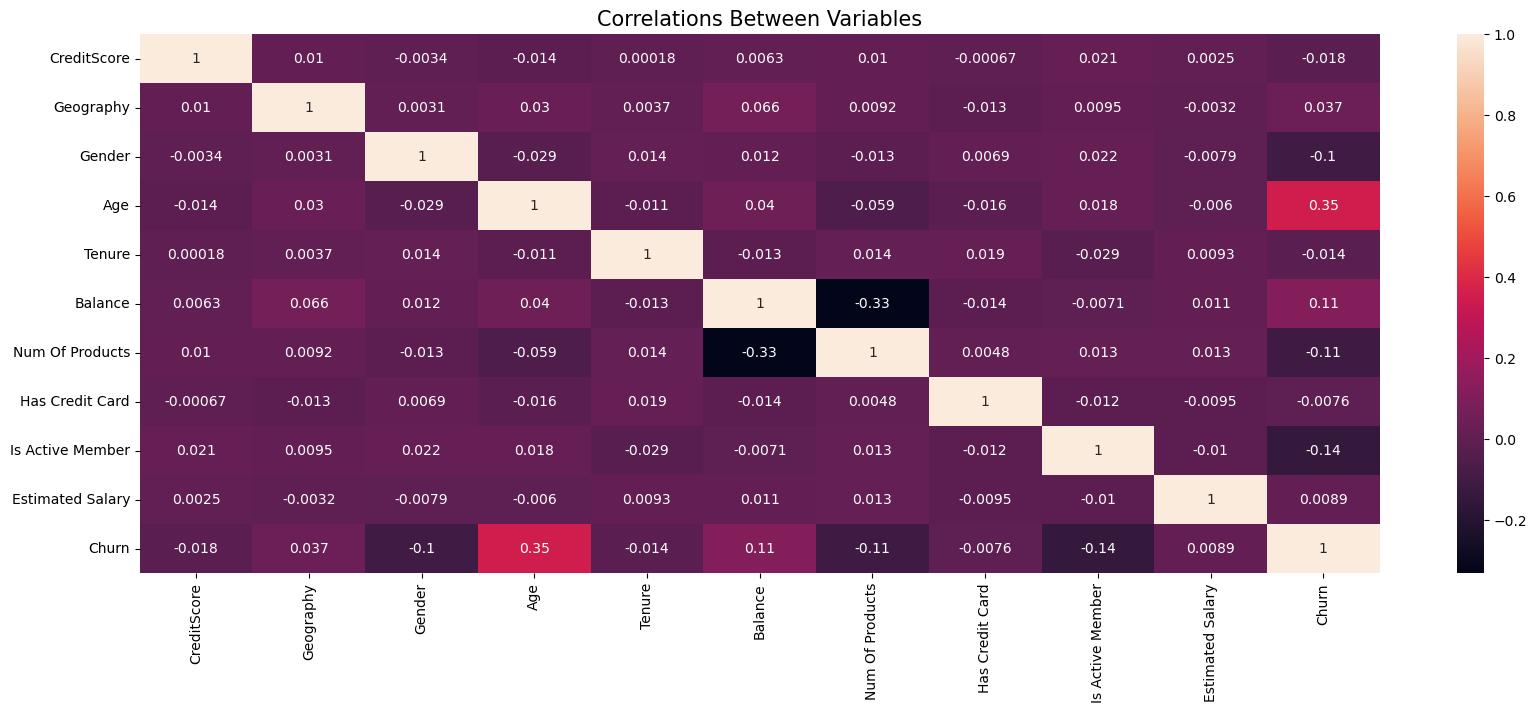

In [38]:
## visulation for correlation beetween variables
plt.figure(figsize=(20,7))
sns.heatmap(data.corr(),annot=True)
plt.title("Correlations Between Variables",size=15)
plt.show()

###### Observation:
    whether a customer leaves or not is strongly Correlated with Customer's Age

#### 5.Handling Imbalanced Class
    Since our target attribute is highly imbalanced, we will use RandomUnderSampling and RandomOverSampling technique to balance the imbalance.

In [39]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn'],
      dtype='object')

In [40]:
# Define Target Variable (y) and Input Variables (X)
X=data.drop(['Churn'], axis=1)
y=data['Churn']

In [41]:
X.shape,y.shape

((9569, 10), (9569,))

In [42]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=2529)

In [43]:
X_ros,y_ros=ros.fit_resample(X,y)

In [44]:
X_ros.shape,y_ros.shape,X.shape,y.shape

((15354, 10), (15354,), (9569, 10), (9569,))

In [45]:
y_ros.value_counts()

1    7677
0    7677
Name: Churn, dtype: int64

<AxesSubplot:ylabel='Frequency'>

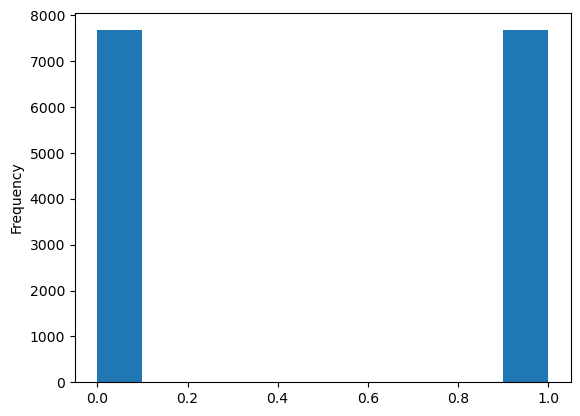

In [46]:
y_ros.plot(kind='hist')

In [47]:
from imblearn.under_sampling import RandomUnderSampler
rus=RandomUnderSampler(random_state=2529)

In [48]:
X_rus,y_rus=rus.fit_resample(X,y)

In [49]:
X_rus.shape,y_rus.shape,X.shape,y.shape

((3784, 10), (3784,), (9569, 10), (9569,))

In [50]:
y_rus.value_counts()

0    1892
1    1892
Name: Churn, dtype: int64

<AxesSubplot:ylabel='Frequency'>

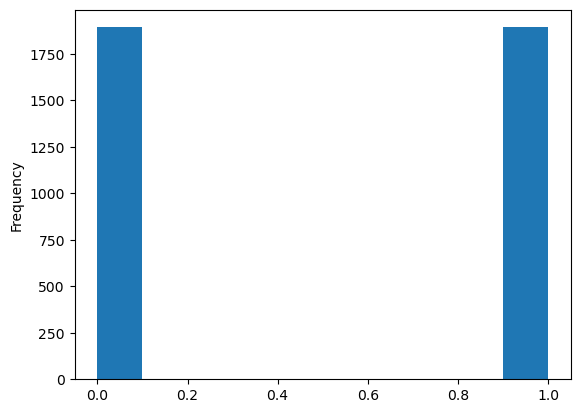

In [51]:
y_rus.plot(kind='hist')

### Train-Test Split

In [60]:
from sklearn.model_selection import train_test_split

##### Split Random Under Sample Data

In [65]:
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus, y_rus, test_size=0.3, random_state=25)

##### Split Random Over Sample Data

In [66]:
X_ros_train,X_ros_test,y_ros_train,y_ros_test=train_test_split(X_ros,y_ros,test_size=0.3,random_state=2529)

#### Split Original Data

In [67]:
X_train, X_test, y_train, y_test = train_test_split = train_test_split(X, y, test_size=0.3, random_state=2529)

#### 4.Scaling
    Scaling is an important part of Feature Engineering. The idea behind scaling is to bring down all the values in a feature within a certain range. Here, we have used StandardScaler on Age, Balance, Credit Score and Estimated salary to bring down the mean to 0 and the varience to 1 of these features.

### Standardize Features

In [68]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

#### Standardize the original data 

In [69]:
X_train[['CreditScore', 'Age', 'Tenure', 'Balance','Estimated Salary']] = sc.fit_transform(X_train[['CreditScore', 'Age', 'Tenure', 'Balance','Estimated Salary']])

In [70]:
X_test[['CreditScore', 'Age', 'Tenure', 'Balance','Estimated Salary']] = sc.fit_transform(X_test[['CreditScore', 'Age', 'Tenure', 'Balance','Estimated Salary']])

#### Standardize the Random Under Sample data 

In [71]:
X_train_rus[['CreditScore', 'Age', 'Tenure', 'Balance','Estimated Salary']] = sc.fit_transform(X_train_rus[['CreditScore', 'Age', 'Tenure', 'Balance','Estimated Salary']])

In [72]:
X_test_rus[['CreditScore', 'Age', 'Tenure', 'Balance','Estimated Salary']] = sc.fit_transform(X_test_rus[['CreditScore', 'Age', 'Tenure', 'Balance','Estimated Salary']])

#### Standardize the Random Over Sample data 

In [75]:
X_ros_train[['CreditScore', 'Age', 'Tenure', 'Balance','Estimated Salary']] = sc.fit_transform(X_ros_train[['CreditScore', 'Age', 'Tenure', 'Balance','Estimated Salary']])

In [76]:
X_ros_test[['CreditScore', 'Age', 'Tenure', 'Balance','Estimated Salary']] = sc.fit_transform(X_ros_test[['CreditScore', 'Age', 'Tenure', 'Balance','Estimated Salary']])

### Model Building and Evaluation

In [78]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [82]:
def pipeline(learner_list,train_x,train_y,test_x,test_y): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - X_train: features training set
       - y_train: outcome training set
       - X_test: features testing set
       - y_test: outcome testing set
    '''
    
    # Get length of Training Data:
    size = len(train_y)
    
    results = {}
    final_results = []
    
    for learner in learner_list:
        
        # Store the learner name:
        results['Algorithm'] = learner.__class__.__name__

        # Fit the learner:
        start = time() # Get start time
        print("Training {}".format(learner.__class__.__name__))
        learner = learner.fit(train_x,train_y)
        end = time() # Get end time

        # Store the training time
        results['Training Time'] = end - start

        start = time() # Get start time
        predictions_test = learner.predict(test_x)
        predictions_train = learner.predict(train_x)
        end = time() # Get end time

        # Store the prediction time
        results['Prediction Time'] = end - start

        # Compute the Accuracy on Test Set
        results['Accuracy: Test'] = accuracy_score(test_y, predictions_test)

        # Compute the Accuracy on Training Set
        results['Accuracy: Train'] = accuracy_score(train_y, predictions_train)

        # Success
        print("Training {} finished in {:.2f} sec".format(learner.__class__.__name__, results['Training Time']))
        print('----------------------------------------------------')
        
        final_results.append(results.copy())
    # Return a dataframe of the results
    return final_results

In [83]:
models = [ XGBClassifier(),
           RandomForestClassifier(),
          SVC(max_iter=10000), AdaBoostClassifier(),
         LogisticRegression(), SGDClassifier()]

In [84]:
from time import time
re = pipeline(models, X_ros_train, y_ros_train, X_ros_test,y_ros_test)
result = pd.DataFrame(re)
result = result.reindex(columns = ['Algorithm', 'Accuracy: Test', 'Prediction Time','Accuracy: Train', 'Training Time'])

Training XGBClassifier
Training XGBClassifier finished in 0.93 sec
----------------------------------------------------
Training RandomForestClassifier
Training RandomForestClassifier finished in 2.33 sec
----------------------------------------------------
Training SVC
Training SVC finished in 9.91 sec
----------------------------------------------------
Training AdaBoostClassifier
Training AdaBoostClassifier finished in 0.86 sec
----------------------------------------------------
Training LogisticRegression
Training LogisticRegression finished in 0.05 sec
----------------------------------------------------
Training SGDClassifier
Training SGDClassifier finished in 0.11 sec
----------------------------------------------------


In [85]:
from time import time
re = pipeline(models, X_train_rus, y_train_rus, X_test_rus,y_test_rus)
result = pd.DataFrame(re)
result = result.reindex(columns = ['Algorithm', 'Accuracy: Test', 'Prediction Time','Accuracy: Train', 'Training Time'])

Training XGBClassifier
Training XGBClassifier finished in 0.28 sec
----------------------------------------------------
Training RandomForestClassifier
Training RandomForestClassifier finished in 0.85 sec
----------------------------------------------------
Training SVC
Training SVC finished in 0.59 sec
----------------------------------------------------
Training AdaBoostClassifier
Training AdaBoostClassifier finished in 0.31 sec
----------------------------------------------------
Training LogisticRegression
Training LogisticRegression finished in 0.03 sec
----------------------------------------------------
Training SGDClassifier
Training SGDClassifier finished in 0.03 sec
----------------------------------------------------


In [86]:
result.sort_values(by = 'Accuracy: Test', inplace = True, ascending = False)
result.reset_index(drop = True)

,Algorithm,Accuracy: Test,Prediction Time,Accuracy: Train,Training Time
0,XGBClassifier,0.752641,0.015528,0.994713,0.282248
1,RandomForestClassifier,0.751761,0.148672,1.000000,0.851494
2,SVC,0.751761,1.533034,0.792674,0.586606
3,AdaBoostClassifier,0.750000,0.064801,0.785121,0.311543
4,LogisticRegression,0.713908,0.005847,0.718278,0.026600
5,SGDClassifier,0.698944,0.007733,0.706571,0.034077


In [87]:
# We are going to create a function to print classification report and confusion matrix for each model
def model_score(model):
    y_pred = model.predict(X_ros_test)
    print(classification_report(y_ros_test, y_pred,digits=4))
    cm = confusion_matrix(y_ros_test, y_pred)
    sns.set_context('talk')
    sns.heatmap(cm, annot=True, fmt='d')
    plt.show()

In [88]:
# Available parameter keys of RandomForest
RandomForestClassifier().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [89]:
from sklearn.model_selection import GridSearchCV
# RandomForestClassifier parameter tuning 
param_grid = {
    'bootstrap': [True],
    'max_depth': [13,20,30],
    'max_features': [3,5,8],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [5,8],
    'n_estimators': [200,300, 400,500]
}
#Create a based model
rf = RandomForestClassifier()
#Instantiate the grid search model
gs1 = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2, error_score='raise')

In [90]:
# Fit the grid search to the data
gs1.fit(X_ros_train,y_ros_train)

Fitting 2 folds for each of 216 candidates, totalling 432 fits


GridSearchCV(cv=2, error_score='raise', estimator=RandomForestClassifier(),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [13, 20, 30],
                         'max_features': [3, 5, 8],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [5, 8],
                         'n_estimators': [200, 300, 400, 500]},
             verbose=2)

In [91]:
print(gs1.best_estimator_)

RandomForestClassifier(max_depth=20, max_features=8, min_samples_leaf=3,
                       min_samples_split=5, n_estimators=400)


In [92]:
rf=RandomForestClassifier(max_depth=20, max_features=5, min_samples_leaf=3,
                       min_samples_split=5, n_estimators=500)

In [93]:
rf.fit(X_ros_train,y_ros_train)

RandomForestClassifier(max_depth=20, max_features=5, min_samples_leaf=3,
                       min_samples_split=5, n_estimators=500)

In [94]:
rf_pred=rf.predict(X_ros_test)

              precision    recall  f1-score   support

           0     0.9340    0.8677    0.8996      2283
           1     0.8785    0.9398    0.9081      2324

    accuracy                         0.9041      4607
   macro avg     0.9063    0.9037    0.9039      4607
weighted avg     0.9060    0.9041    0.9039      4607



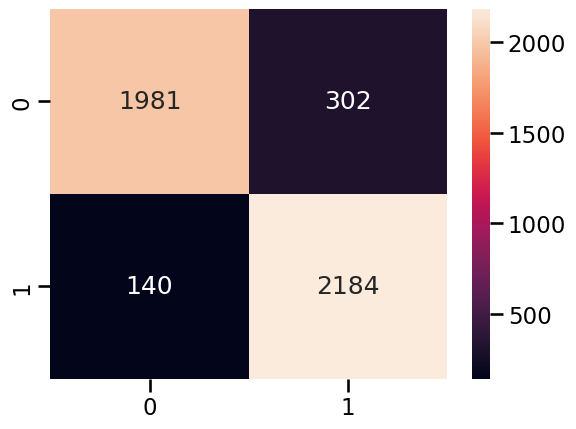

In [95]:
# classification report and confution matrix for RandomForestClassifier model
model_score(rf)

In [96]:
# XGBClassifier parameter tuning
# n_jobs=-1 to allow run it on all cores
params = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01,0.05,0.1],
    'booster': ['gbtree', 'gblinear'],
    'gamma': [0, 0.5, 1],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0.5, 1, 5],
    'base_score': [0.2, 0.5, 0.9]
}
#Instantiate the grid search model
gs2 = GridSearchCV(XGBClassifier(n_jobs=-1), params, n_jobs=-1, cv=2, scoring='roc_auc',error_score='raise')
gs2.fit(X_ros_train, y_ros_train)


GridSearchCV(cv=2, error_score='raise',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=-1,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
  

In [97]:
print('Best score:', gs2.best_score_)

Best score: 0.9377850149043971


In [98]:
print(gs2.best_params_)

{'base_score': 0.9, 'booster': 'gbtree', 'gamma': 0, 'learning_rate': 0.1, 'n_estimators': 500, 'reg_alpha': 0.5, 'reg_lambda': 0.5}


In [99]:
xgb=XGBClassifier(base_score= 0.9, booster= 'gbtree', gamma= 0, learning_rate= 0.1, n_estimators= 500, reg_alpha= 0, reg_lambda= 0.5)

In [100]:
xgb.fit(X_ros_train, y_ros_train)

XGBClassifier(base_score=0.9, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [101]:
xgb_pred=xgb.predict(X_ros_test)

              precision    recall  f1-score   support

           0     0.8922    0.8629    0.8773      2283
           1     0.8695    0.8976    0.8833      2324

    accuracy                         0.8804      4607
   macro avg     0.8809    0.8802    0.8803      4607
weighted avg     0.8808    0.8804    0.8804      4607



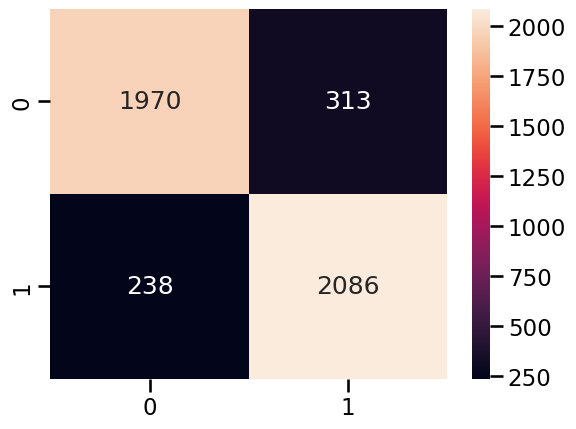

In [102]:
model_score(xgb)

In [103]:
# Available parameter keys of SVM 
SVC().get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [104]:
# SVM classifier parameter tuning
param_grid={'C':[0.1,1,10],
           'gamma':[1,0.1,0.01],
           'kernel':['rbf'],
           'class_weight':['balanced']}
gs3=GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)
gs3.fit(X_ros_train,y_ros_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=  13.8s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=  13.8s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=  10.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   9.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=  15.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=  18.4s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=  14.0s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   7.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   5.1s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   5.2s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   5.5s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [105]:
print(gs3.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [106]:
svc=SVC(C=10, class_weight='balanced', gamma=1, probability=True)

In [107]:
svc.fit(X_ros_train,y_ros_train)

SVC(C=10, class_weight='balanced', gamma=1, probability=True)

In [108]:
svc_pred=svc.predict(X_ros_test)

              precision    recall  f1-score   support

           0     0.9713    0.8739    0.9200      2283
           1     0.8872    0.9746    0.9288      2324

    accuracy                         0.9247      4607
   macro avg     0.9292    0.9242    0.9244      4607
weighted avg     0.9289    0.9247    0.9245      4607



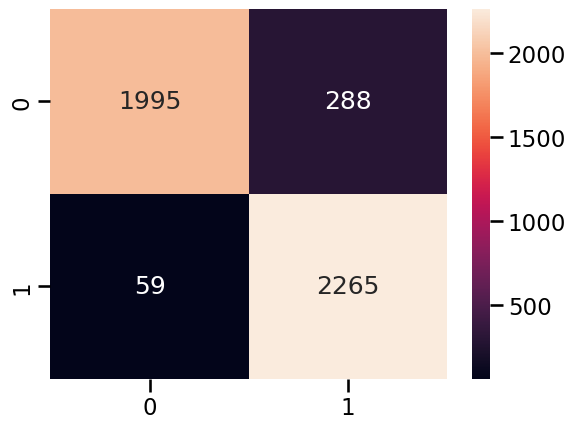

In [109]:
# classification report and confution matrix for SVM model
model_score(svc)

In [110]:
# calculating the false positive and true positive rate for each of the models
fpr1, tpr1, thresh1 = roc_curve(y_ros_test, rf.predict_proba(X_ros_test)[:, 1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_ros_test, xgb.predict_proba(X_ros_test)[:, 1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_ros_test, svc.predict_proba(X_ros_test)[:, 1], pos_label=1)

In [111]:
# Fething the Area under the curve 
auc_score1 = roc_auc_score(y_ros_test, rf.predict_proba(X_ros_test)[:, 1])
auc_score2 = roc_auc_score(y_ros_test, xgb.predict_proba(X_ros_test)[:,1])
auc_score3 = roc_auc_score(y_ros_test, svc.predict_proba(X_ros_test)[:, 1])

print("Random Forest(AUC_Score): ", auc_score1)
print("XGBoost(AUC_Score): ", auc_score2)
print("SVC(AUC_Score):", auc_score3)

Random Forest(AUC_Score):  0.9654597364490815
XGBoost(AUC_Score):  0.942290468425231
SVC(AUC_Score): 0.9754194174859754


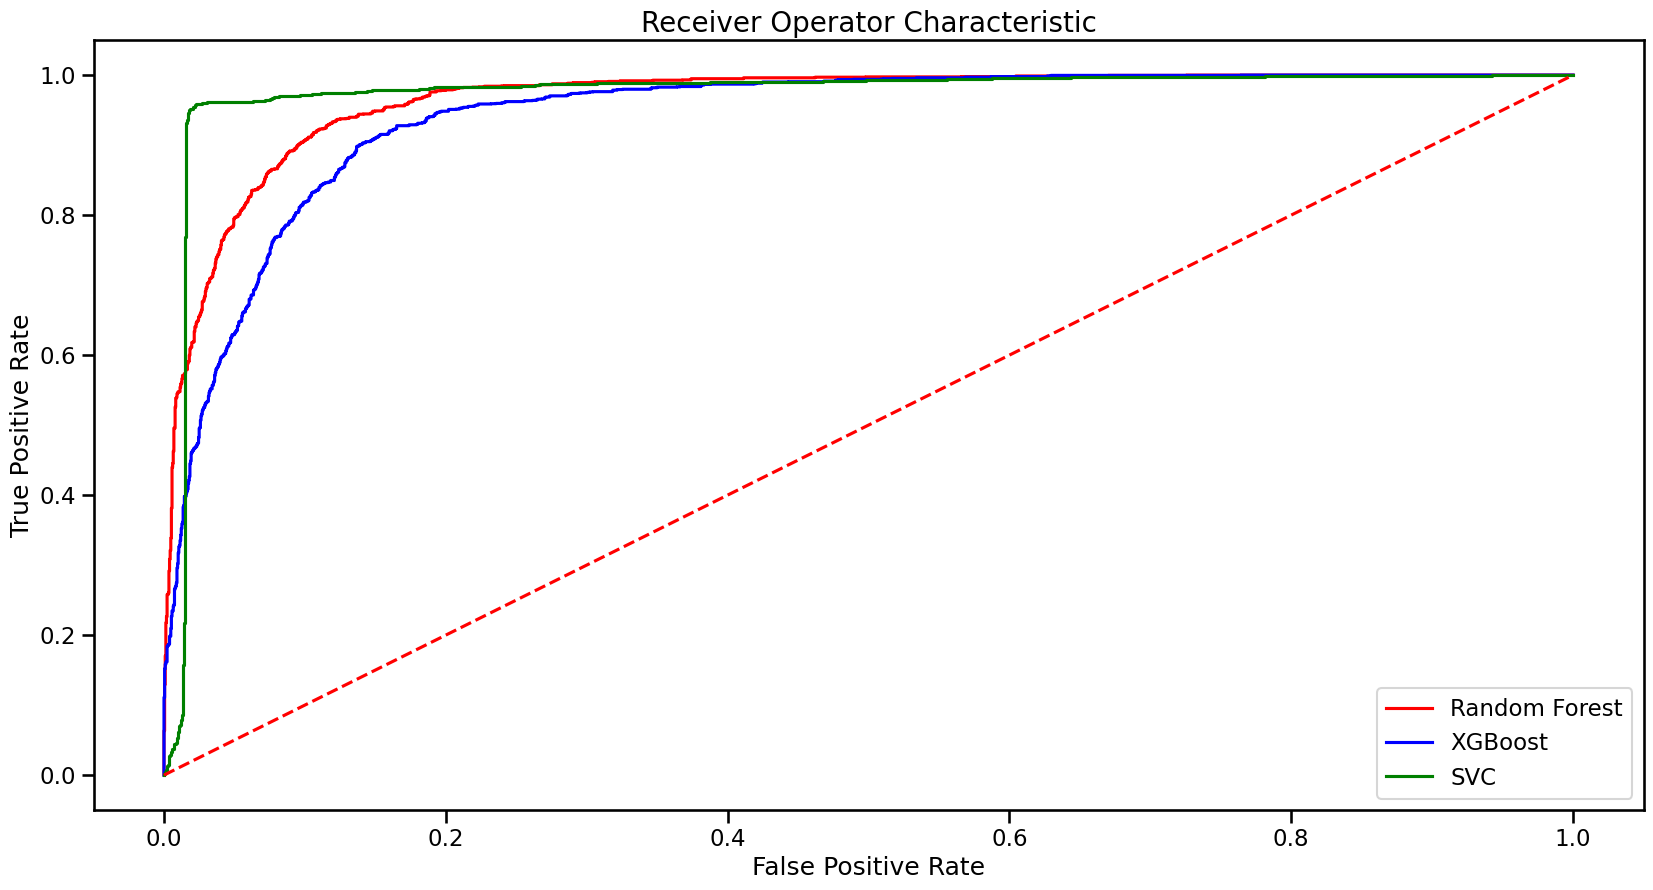

In [112]:
# Plotting ROC curve
plt.figure(figsize=(20,10))
plt.plot(fpr1, tpr1,  color = 'red', label='Random Forest')
plt.plot(fpr2, tpr2, color = 'blue', label='XGBoost')
plt.plot(fpr3, tpr3, color = 'green', label='SVC')
         
plt.title('Receiver Operator Characteristic', fontsize=20)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1],'r--') 
plt.legend(loc = 'best')
plt.show()

### Model Comparison Results:

    ROC-AUC curve shows the model performance by plotting the false positive rate to true positive rate
    More the skewness of the curve towards the upper left corner higher is the area under the roc curve and better is the model performance.
    From the ROC-AUC curve it is clear that all three model performances are very close.
    Support Vector Machine showed a tremendous performance.

    Both Random Forest(Bagging) and XGBoost(Boosting) are ensemble techniques and their performances are very close.
    All of the models have achived above 80% accuracy and above 0.80 f1-score and around 0.90 AUC_Score.

###### Support Vector Classifier has got highest score in every aspect. So,we are choosing Support Vector Classifier as our final model for prediction purpose